In [1]:
# Definición de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
datos = pd.read_csv(r'C:\Users\miche\cliente_tienda.csv', low_memory=False)
datos.head()

,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("\nDescripción de los datos:")
print(datos.describe())


Descripción de los datos:
       CustomerID        Edad  Ingresos Anuales ($)  \
count  200.000000  200.000000            200.000000   
mean   100.500000   38.850000             60.560000   
std     57.879185   13.969007             26.264721   
min      1.000000   18.000000             15.000000   
25%     50.750000   28.750000             41.500000   
50%    100.500000   36.000000             61.500000   
75%    150.250000   49.000000             78.000000   
max    200.000000   70.000000            137.000000   

       Porcentajde de gastos (1-100)  
count                     200.000000  
mean                       50.200000  
std                        25.823522  
min                         1.000000  
25%                        34.750000  
50%                        50.000000  
75%                        73.000000  
max                        99.000000  


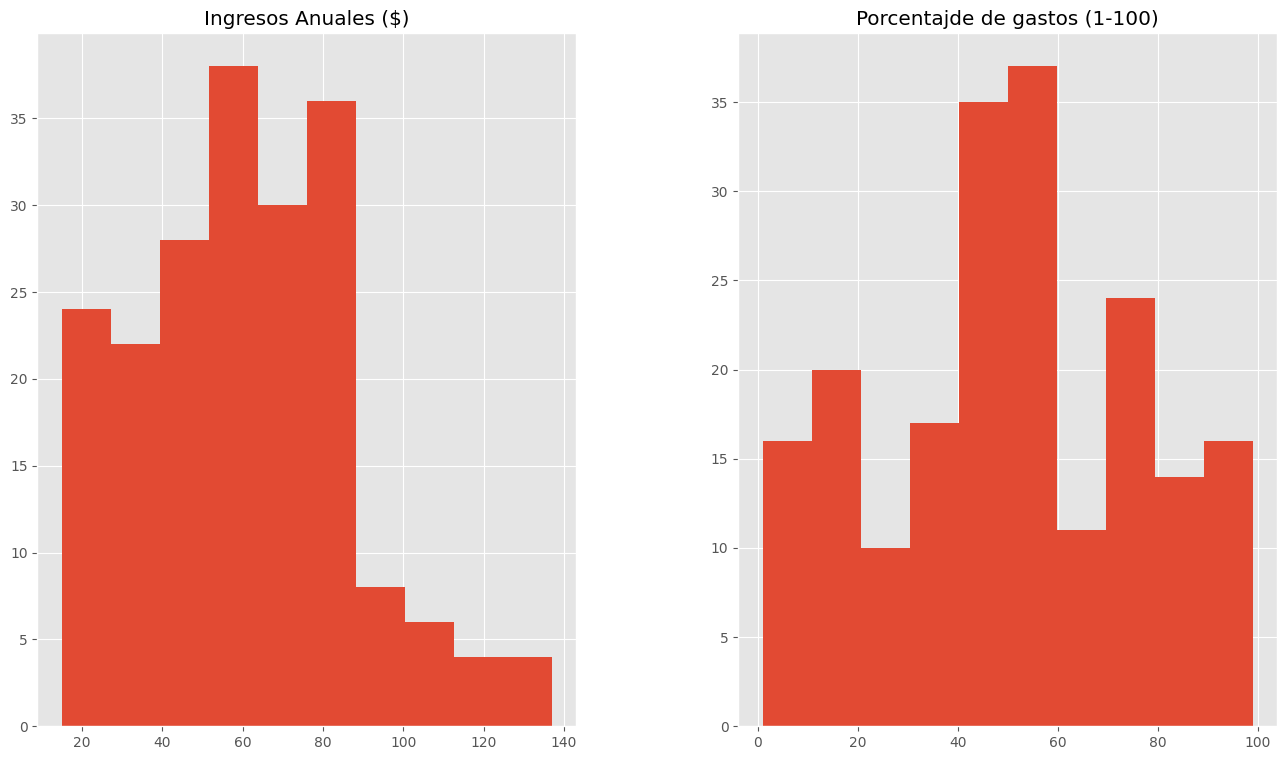

In [ ]:
columnas_interes = ["Ingresos Anuales ($)", "Porcentajde de gastos (1-100)"]
datos[columnas_interes].hist()
plt.show()

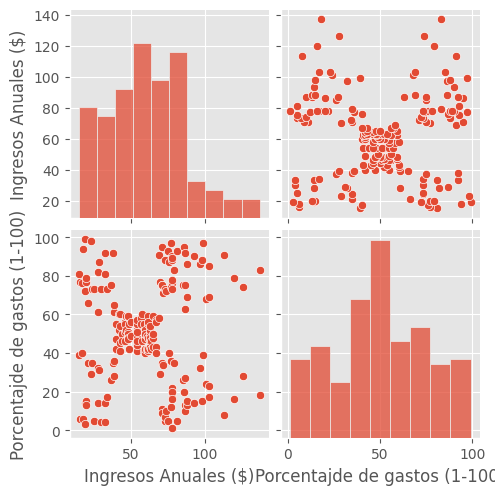

In [ ]:
sb.pairplot(datos[columnas_interes])
plt.show()

In [8]:
# 4. Definir las entradas
X = np.array(datos[columnas_interes])
print(f"Forma de los datos de entrada: {X.shape}")

Forma de los datos de entrada: (200, 2)


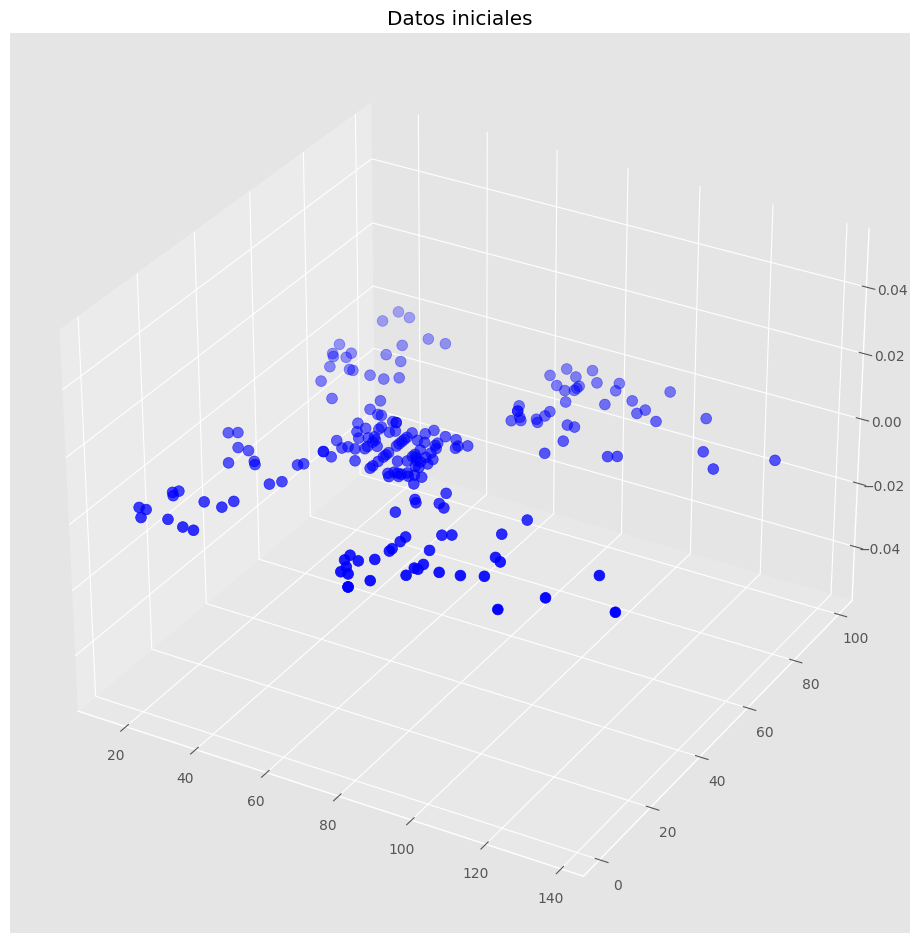

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], c='blue', s=60)
plt.title("Datos iniciales")
plt.show()


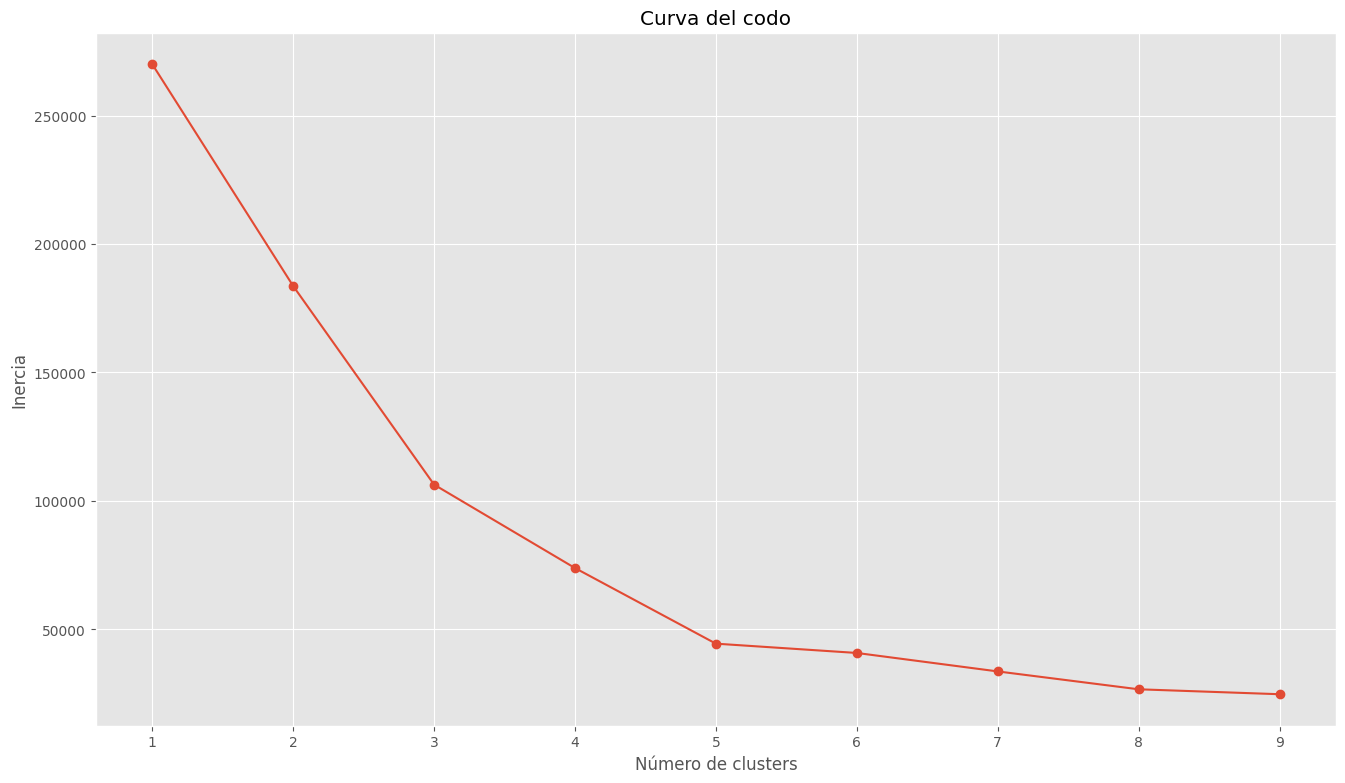

In [ ]:
Nc = range(1, 10)
kmeans_models = [KMeans(n_clusters=i, random_state=42) for i in Nc]
scores = [model.fit(X).inertia_ for model in kmeans_models]

plt.plot(Nc, scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Curva del codo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("\nCentroides de los clusters:")
print(centroids)


Centroides de los clusters:
[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


In [ ]:
colores = ['red', 'green', 'blue']
asignar = [colores[label] for label in labels]

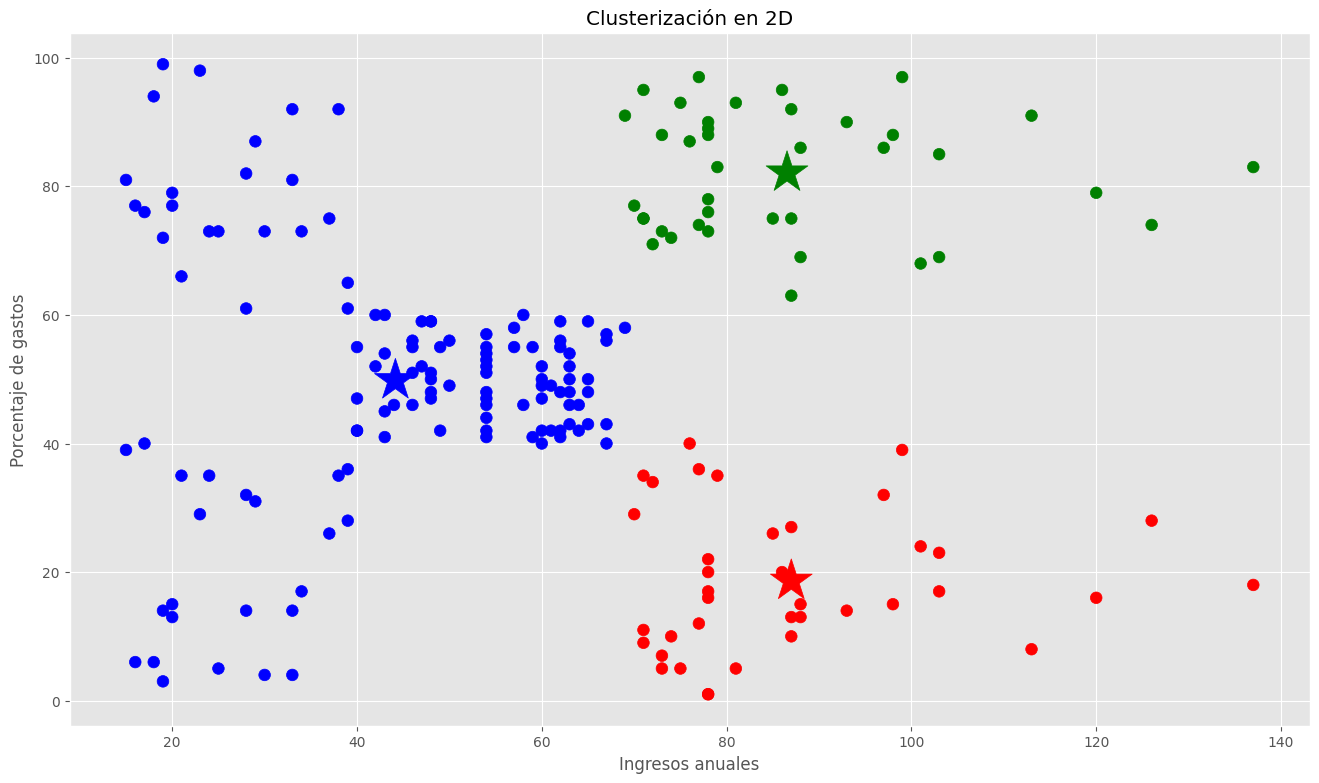

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=1000)
plt.title("Clusterización en 2D")
plt.xlabel("Ingresos anuales")
plt.ylabel("Porcentaje de gastos")
plt.show()

In [ ]:

datos["Cluster"] = labels
print("\nCantidad de elementos por cluster:")
print(datos["Cluster"].value_counts())


Cantidad de elementos por cluster:
Cluster
2    123
1     39
0     38
Name: count, dtype: int64


In [ ]:

print("\nEstadísticas descriptivas por cluster:")
print(datos.groupby("Cluster")[["Edad", "Ingresos Anuales ($)", "Porcentajde de gastos (1-100)"]].mean())


Estadísticas descriptivas por cluster:
              Edad  Ingresos Anuales ($)  Porcentajde de gastos (1-100)
Cluster                                                                
0        40.394737             87.000000                      18.631579
1        32.692308             86.538462                      82.128205
2        40.325203             44.154472                      49.829268


In [20]:
# 9. Clasificación de una nueva muestra
X_new = np.array([[44, 50]])  # Ejemplo: ingreso anual y porcentaje de gasto
new_label = kmeans.predict(X_new)
print(f"\nLa nueva muestra pertenece al cluster: {new_label[0]}")


La nueva muestra pertenece al cluster: 2



Actividad de ventas para el Cluster 2:
    Edad  Cantidad
0     18         4
1     19         6
2     20         4
3     21         5
4     22         3
5     23         5
6     24         4
7     25         1
8     26         2
9     27         4
10    29         2
11    30         2
12    31         5
13    32         2
14    33         1
15    34         1
16    35         6
17    36         1
18    37         1
19    38         3
20    40         4
21    42         1
22    43         1
23    45         2
24    46         2
25    47         3
26    48         4
27    49         7
28    50         4
29    51         2
30    52         1
31    53         2
32    54         3
33    55         1
34    57         1
35    58         1
36    59         2
37    60         3
38    63         2
39    64         1
40    65         2
41    66         2
42    67         4
43    68         3
44    69         1
45    70         2


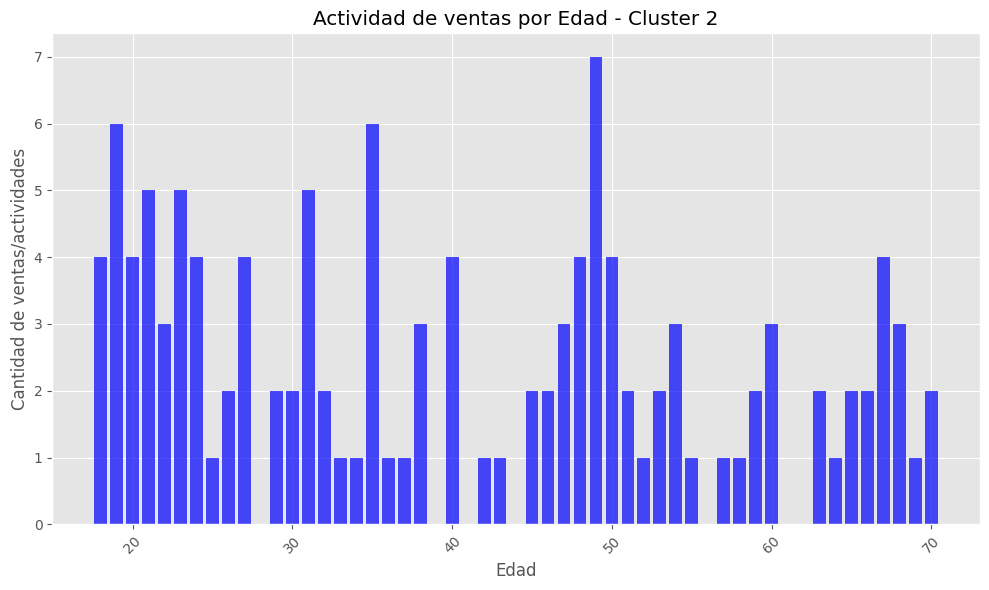


Actividad de ventas para el Cluster 1:
    Edad  Cantidad
0     27         2
1     28         3
2     29         3
3     30         5
4     31         3
5     32         8
6     33         1
7     34         1
8     35         3
9     36         3
10    38         3
11    39         3
12    40         1


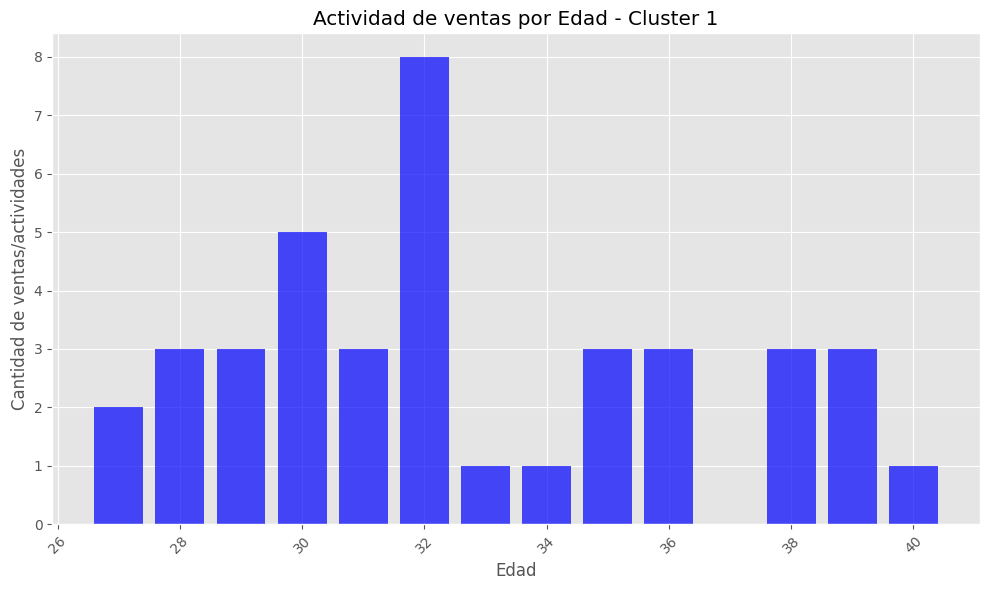


Actividad de ventas para el Cluster 0:
    Edad  Cantidad
0     19         2
1     20         1
2     23         1
3     25         2
4     28         1
5     32         1
6     33         1
7     34         3
8     36         2
9     37         2
10    40         1
11    41         2
12    42         1
13    43         2
14    44         2
15    45         1
16    46         1
17    47         3
18    48         1
19    50         1
20    52         1
21    54         1
22    56         1
23    57         1
24    58         1
25    59         2


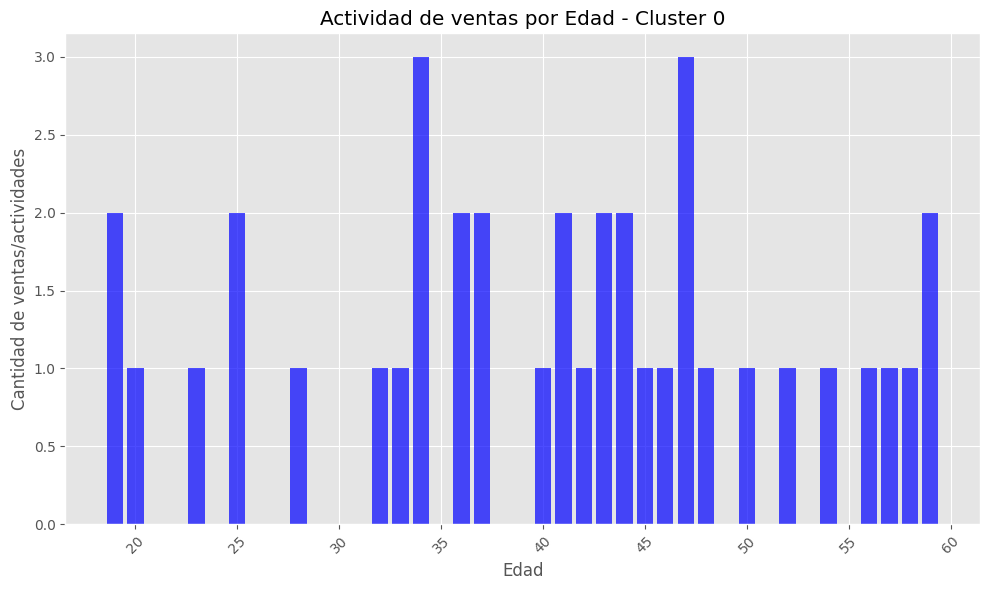

In [ ]:

for cluster_id in datos["Cluster"].unique():
    
    group_referrer_index = datos["Cluster"] == cluster_id
    group_referrals = datos[group_referrer_index]
    

    diversidadGrupo = group_referrals.groupby('Edad').size().reset_index(name='Cantidad')
    

    print(f"\nActividad de ventas para el Cluster {cluster_id}:")
    print(diversidadGrupo)


    plt.figure(figsize=(10, 6))
    plt.bar(diversidadGrupo['Edad'], diversidadGrupo['Cantidad'], color='blue', alpha=0.7)
    plt.title(f"Actividad de ventas por Edad - Cluster {cluster_id}")
    plt.xlabel("Edad")
    plt.ylabel("Cantidad de ventas/actividades")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
